In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from obspy import read
import pandas as pd
import os


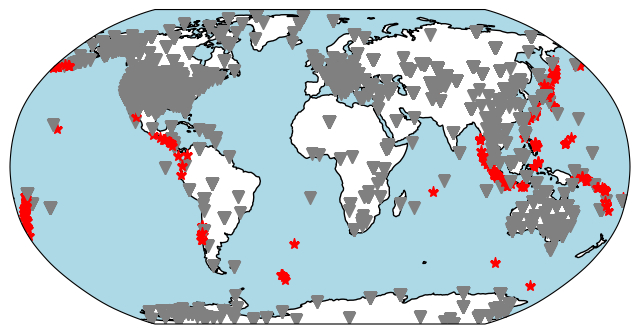

<Figure size 640x480 with 0 Axes>

In [10]:
def nameToDir(filename):
    return('dir_'+filename[5:27])
datafolder = '../pair_data_u_v2'

# 创建一个使用 Orthographic 投影的图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.Robinson()})

# 添加陆地和海洋特征
# ax.add_feature(cfeature.LAND, facecolor='gray')  # 灰色陆地
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # 浅蓝色海洋
# ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')  # 国家边界
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  # 海岸线
for comseisfile in os.listdir(datafolder):
    comseisdir = nameToDir(comseisfile)
    sacdir = os.listdir(os.path.join('../work_source/', comseisdir))[0]
    sacdir = os.path.join('../work_source/', comseisdir)+'/'+sacdir
    datapd = pd.read_csv(os.path.join(datafolder, comseisfile), header=None)
    n = 0
    for sacFileName in datapd.iloc[:, 0]:
        sacfilePath = os.path.join(sacdir, sacFileName)
        sacData = read(sacfilePath)
        if n == 0:
            evlon = sacData[0].stats.sac.evlo
            evlat = sacData[0].stats.sac.evla
            ax.plot(evlon, evlat, marker='*', color = 'red',markersize=8, transform=ccrs.Geodetic())
        n+=1
        stlon = sacData[0].stats.sac.stlo
        stlat = sacData[0].stats.sac.stla
        ax.plot(stlon, stlat, marker = 'v',color='grey', markersize=8, transform=ccrs.Geodetic()) 
ax.set_global()
plt.show()
plt.savefig('test.png',dpi=300)

In [11]:
!pwd

/Users/csmac/projects/G3/script


In [ ]:
def nameToDir(filename):
    return('dir_'+filename[5:27])
datafolder = '../pair_data_u_v2'

for comseisfile in os.listdir(datafolder):
    data = pd.read_csv(os.path.join(datafolder,comseisfile),header=None)
    print(f'{comseisfile}::::{len(data)}')

NameError: name 'os' is not defined